In [2]:
pip install numpy

In [3]:
pip install pandas

In [4]:
pip install scikit-learn

In [5]:
pip install matplotlib

In [6]:
pip install scipy

In [7]:
pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5988 sha256=26c3d74aec5c7d6c06815c162e760623367a1bdc293ce8d97104f0db49b0f2bd
  Stored in directory: /root/.cache/pip/wheels/69/e2/5c/da8f96a08c63469bc8b10e206cd4c78e8886d8acb8699f84c2
Successfully built pickle-mixin


In [8]:
pip install seaborn

In [9]:
pip install Flask

In [10]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Anaemia Sense/anemia.csv')

In [12]:
# 2. Initial Data Inspection
print(df.head())

   Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [14]:
df.shape

(1421, 6)

In [15]:
# 3. Check for missing values
print(df.isnull().sum())

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


> Checking if there's any class imbalance

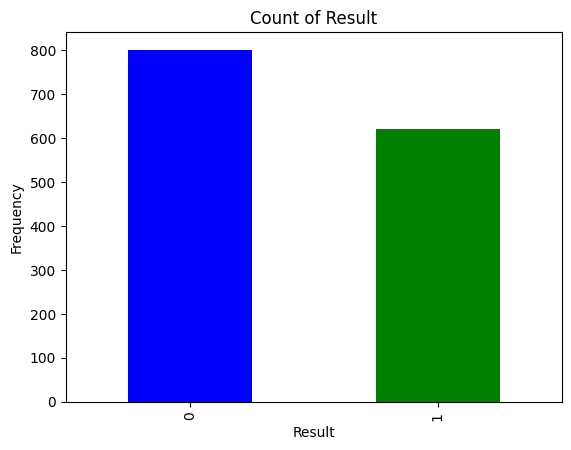

In [16]:
# 0 - not anemic, 1 - anemic
# Checking the count of anemia and not anemia

results = df['Result'].value_counts()

# Plotting class distribution
results.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()


> Yes, there is class imbalance in our dataset so we need to use undersampling to handle the class imbalance.

In [17]:
# We can see that the female count is more than the male,
# so we can balance it using undersampling

from sklearn.utils import resample
import pandas as pd

# Splitting majority and minority classes
majorclass = df[df['Result'] == 0]
minorclass = df[df['Result'] == 1]

# Downsample the majority class
major_downsample = resample(majorclass,
                            replace=False,                # no replacement
                            n_samples=len(minorclass),    # match minority count
                            random_state=42)              # reproducibility

# Combine minority and downsampled majority
df = pd.concat([major_downsample, minorclass])

# Check new class distribution
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


In [18]:
df.describe()

Gender   Hemoglobin          MCH         MCHC          MCV  \
count  1240.000000  1240.000000  1240.000000  1240.000000  1240.000000   
mean      0.540323    13.218145    22.903952    30.277984    85.620968   
std       0.498573     1.976190     3.993624     1.394515     9.673794   
min       0.000000     6.600000    16.000000    27.800000    69.400000   
25%       0.000000    11.500000    19.400000    29.100000    77.300000   
50%       1.000000    13.000000    22.700000    30.400000    85.300000   
75%       1.000000    14.900000    26.200000    31.500000    94.225000   
max       1.000000    16.900000    30.000000    32.500000   101.600000   

            Result  
count  1240.000000  
mean      0.500000  
std       0.500202  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

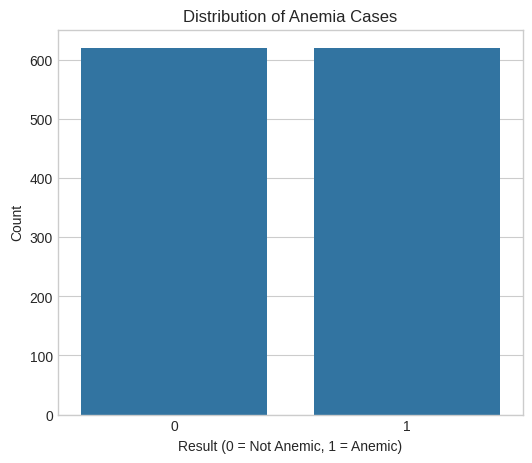

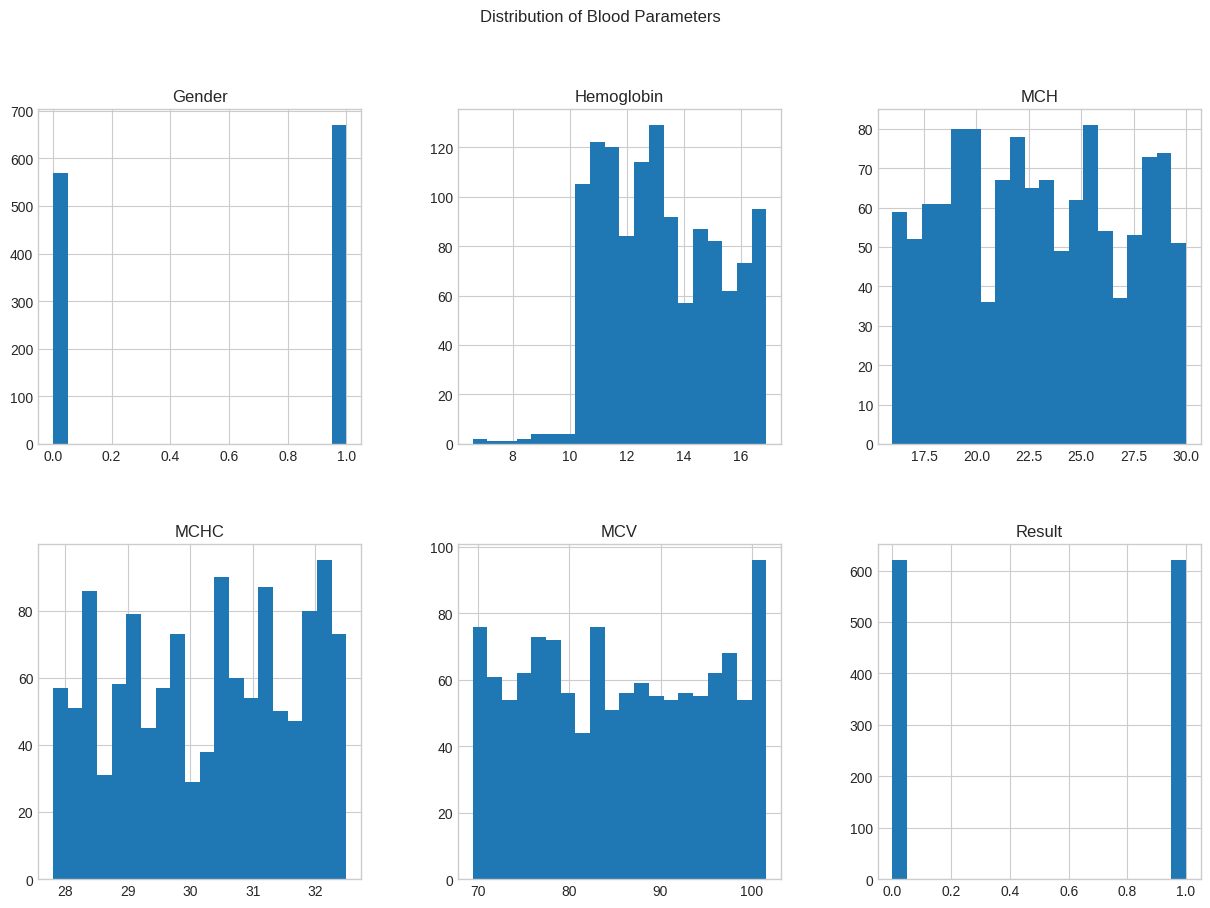

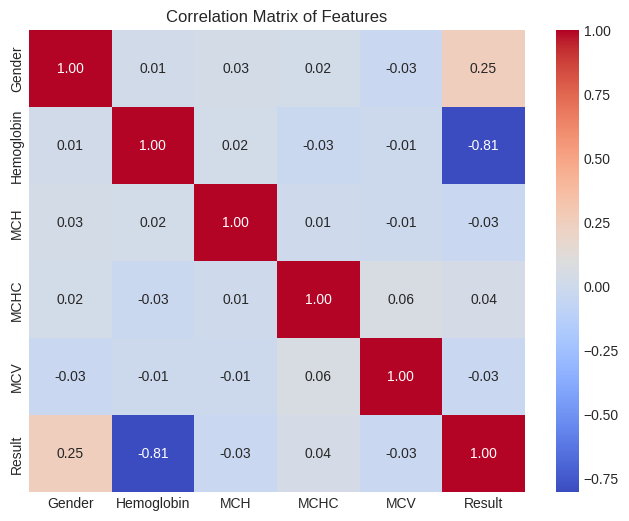

In [19]:
# 5. Visual Analysis
plt.style.use('seaborn-v0_8-whitegrid')

# a. Distribution of the 'Result' variable (Anemic vs. Not Anemic)
plt.figure(figsize=(6, 5))
sns.countplot(x='Result', data=df)
plt.title('Distribution of Anemia Cases')
plt.xlabel('Result (0 = Not Anemic, 1 = Anemic)')
plt.ylabel('Count')
plt.show()

# b. Histograms for each feature to see their distribution
df.hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Blood Parameters')
plt.show()

# c. Correlation Matrix Heatmap
# This shows how different features are related to each other.
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [20]:
print(df['Gender'].value_counts())

Gender
1    670
0    570
Name: count, dtype: int64


> Based on above o/p and the context of our anemia project, we can say that the encoding is:

    1 = Female (with 670 individuals)

    0 = Male (with 570 individuals)

> This aligns perfectly with the fact that anemia is more common in women, which is reflected by the higher count for the value 1.

> Univariate Analysis:

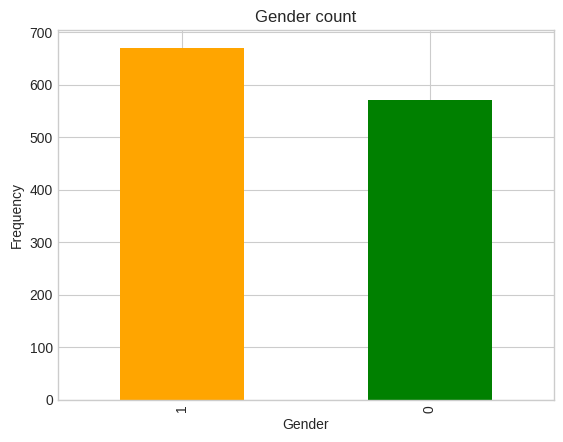

In [21]:
#Gender Count Bar Chart

output = df['Gender'].value_counts()
output.plot(kind='bar', color=['orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender count')
plt.show()

<Axes: xlabel='Hemoglobin', ylabel='Count'>

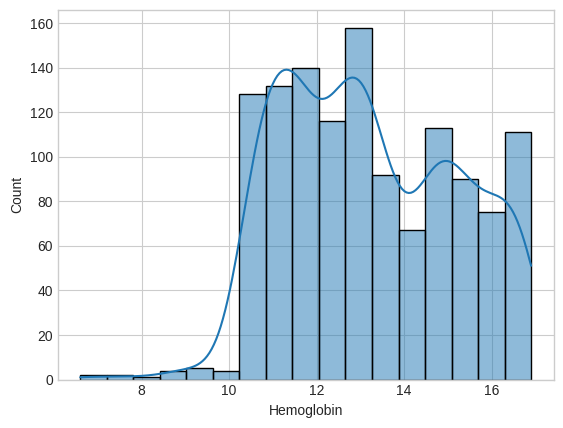

In [22]:
#Hemoglobin Distribution Plot
sns.histplot(data=df, x='Hemoglobin', kde=True)

# Bivariate Analysis

> Let's create a grouped bar chart to compare the average hemoglobin levels between males and females, separated by their anemia result.

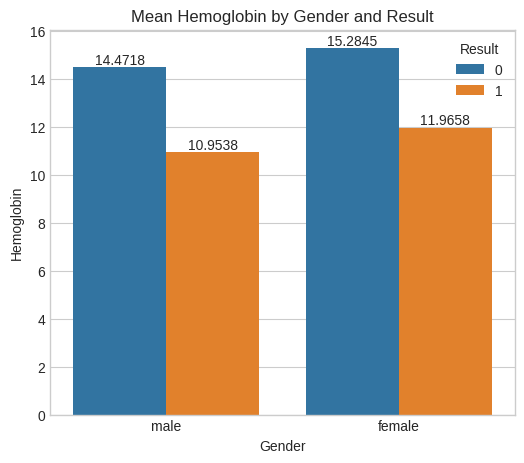

In [23]:
plt.figure(figsize=(6,5))


ax = sns.barplot(y=df["Hemoglobin"], x=df["Gender"], hue=df["Result"], errorbar=None)
ax.set_xticks(ticks=[0, 1], labels=['male', 'female'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Mean Hemoglobin by Gender and Result")
plt.show()

# Multivariate Analysis

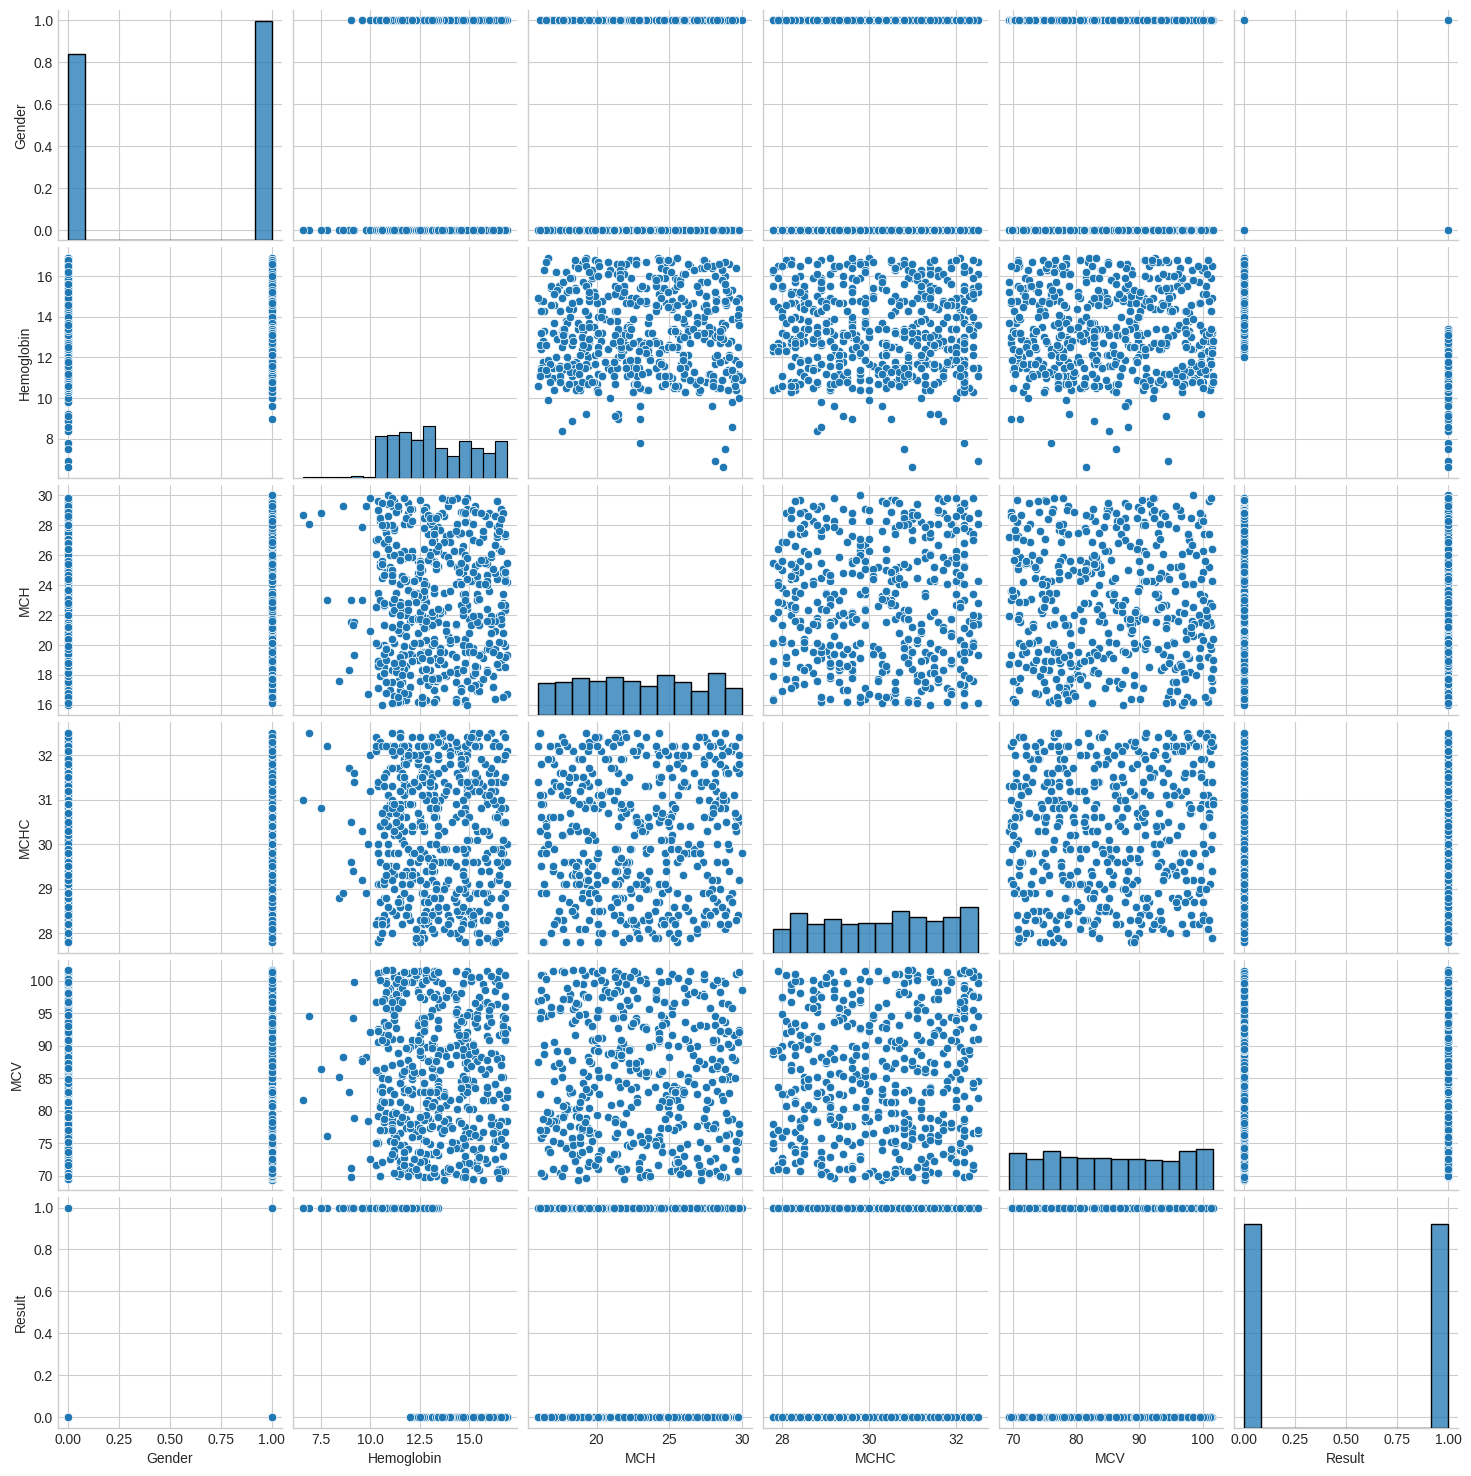

In [24]:
sns.pairplot(df)

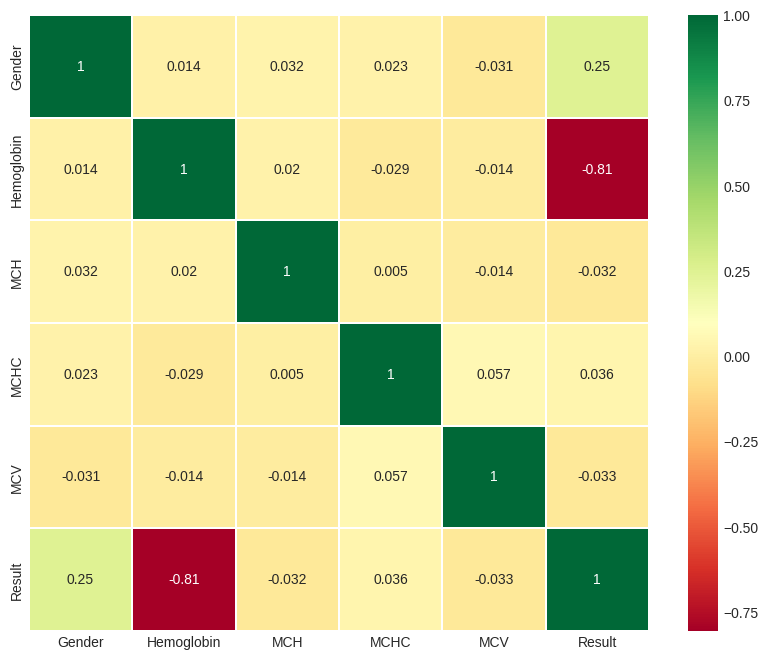

In [25]:
# 1. Calculate the correlation matrix
correlation_matrix = df.corr()
# 2. Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# 3. Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)
# 4. Display the plot
plt.show()

> Splitting data into train and test

> Fit

In [27]:
X = df.drop('Result', axis = 1)
X

Gender  Hemoglobin   MCH  MCHC   MCV
1234       1        16.6  18.8  28.1  70.9
1188       0        15.3  18.3  30.4  93.4
106        0        14.8  20.4  28.5  91.1
954        0        14.6  16.9  31.9  78.1
112        0        15.9  28.7  31.0  81.6
...      ...         ...   ...   ...   ...
1415       1        13.2  20.1  28.8  91.2
1416       0        10.6  25.4  28.2  82.9
1417       1        12.1  28.3  30.4  86.9
1418       1        13.1  17.7  28.1  80.7
1420       0        11.8  21.2  28.4  98.1

[1240 rows x 5 columns]

In [28]:
Y = df['Result']
Y

1234    0
1188    0
106     0
954     0
112     0
       ..
1415    1
1416    1
1417    1
1418    1
1420    1
Name: Result, Length: 1240, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


> Let's train the model with multiple classification algorithms

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test,y_pred)
c_lr = classification_report(y_test,y_pred)
print('Accuracy Score:', acc_lr)
print(c_lr)

Accuracy Score: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test,y_pred)
c_rf = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



## Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test,y_pred)
c_dt = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_dt)
print(c_dt)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



## Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVC

support_vector = SVC()
support_vector.fit(x_train, y_train)
y_pred = support_vector.predict(x_test)

acc_svc = accuracy_score(y_test,y_pred)
c_svc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_svc)
print(c_svc)

Accuracy Score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



## Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test,y_pred)
c_nb = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_nb)
print(c_nb)

Accuracy Score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)

acc_gbc = accuracy_score(y_test,y_pred)
c_gbc = classification_report(y_test,y_pred)

print('Accuracy Score: ',acc_gbc)
print(c_gbc)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



> Testing the model

## 1. Making a Prediction
> Below code uses the trained Gradient Boosting Classifier (GBC) to predict the outcome for a new set of input values.

In [50]:
import pandas as pd

# Let's list our feature names in the exact order they appeared in the training data
feature_names = ['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'] # Use your actual column names!

# Create a DataFrame for the new data
new_data = pd.DataFrame([[0, 11.6, 22.3, 30.9, 74.5]], columns=feature_names)

# Predict using the new DataFrame
prediction = GBC.predict(new_data)

print(prediction)

[1]


## 2. Interpreting the Prediction
> This code checks the prediction result (which will be either 0 or 1) and prints a user-friendly message.



In [51]:
if prediction[0] == 0:
    print("You don't have any Anemic Disease")
elif prediction[0] == 1:
    print("You have anemic Disease")

You have anemic Disease


In [54]:
model = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'RandomForest classifier',
              'Gaussian Navie Bayes', 'Support Vector Classifier', 'Gradient Boost Classifier'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_svc, acc_gbc]
})

In [55]:
model

Model     Score
0        Logistic Regression  0.991935
1   Decision Tree Classifier  1.000000
2    RandomForest classifier  1.000000
3       Gaussian Navie Bayes  0.979839
4  Support Vector Classifier  0.939516
5  Gradient Boost Classifier  1.000000

In [56]:
import pickle
import warnings
pickle.dump(GBC, open("model.pkl", "wb"))